# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [41]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier as knn
plt.style.use('ggplot')

In [23]:
import pandas as pd
recipe = pd.read_csv('recipe_site_traffic_2212.csv')
recipe

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [24]:
import numpy as np

missing_values = ['missing', '-', '', 'NaN', None,np.nan]
recipe['high_traffic'] = recipe['high_traffic'].apply(lambda x: 'Low' if x in missing_values else x)
recipe

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,Low
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [25]:
recipe['sugar'] = recipe['sugar'].fillna(recipe['sugar'].mean())
recipe['calories'] = recipe['calories'].fillna(recipe['calories'].mean())
recipe['protein'] = recipe['protein'].fillna(recipe['protein'].mean())
recipe['carbohydrate'] = recipe['carbohydrate'].fillna(recipe['carbohydrate'].mean())
recipe

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low
...,...,...,...,...,...,...,...,...
942,943,1161.000000,5.310000,22.390000,44.220000,Lunch/Snacks,2,Low
943,944,435.939196,35.069676,9.046547,24.149296,Potato,2,High
944,945,951.740000,29.420000,3.570000,13.870000,Pork,2,High
945,946,266.610000,35.770000,0.970000,8.070000,Potato,6,High


In [26]:
recipe['category'].mode()

0    Breakfast
Name: category, dtype: object

In [27]:
missing_values = ['missing', '-', '', 'NaN', None,np.nan]  

cat =  ['Lunch/Snacks', 'Beverages', 'Potato',
'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal']

# replace nan values with the mode of 'category'
recipe['category'] = recipe['category'].apply(lambda x: 'Breakfast' if (x in missing_values or x not in cat) else x)
recipe

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low
...,...,...,...,...,...,...,...,...
942,943,1161.000000,5.310000,22.390000,44.220000,Lunch/Snacks,2,Low
943,944,435.939196,35.069676,9.046547,24.149296,Potato,2,High
944,945,951.740000,29.420000,3.570000,13.870000,Pork,2,High
945,946,266.610000,35.770000,0.970000,8.070000,Potato,6,High


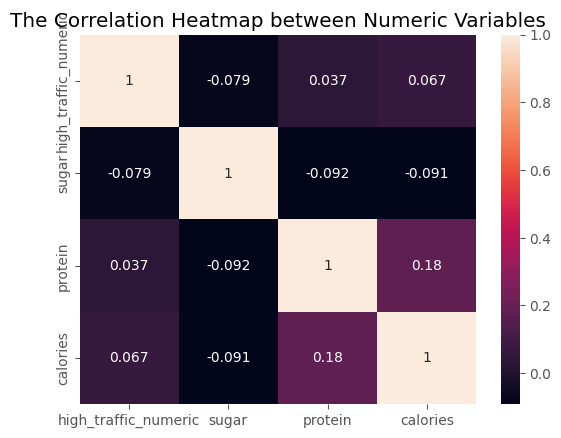

In [7]:
import seaborn as sns

# Convert 'high_traffic' to numeric values
recipe['high_traffic_numeric'] = recipe['high_traffic'].map({'High': 1, 'Low': 0})

# Select numeric columns for correlation
numeric = recipe[['high_traffic_numeric', 'sugar', 'protein', 'calories']]

# Plot the heatmap
sns.heatmap(numeric.corr(), annot=True).set(title='The Correlation Heatmap between Numeric Variables');

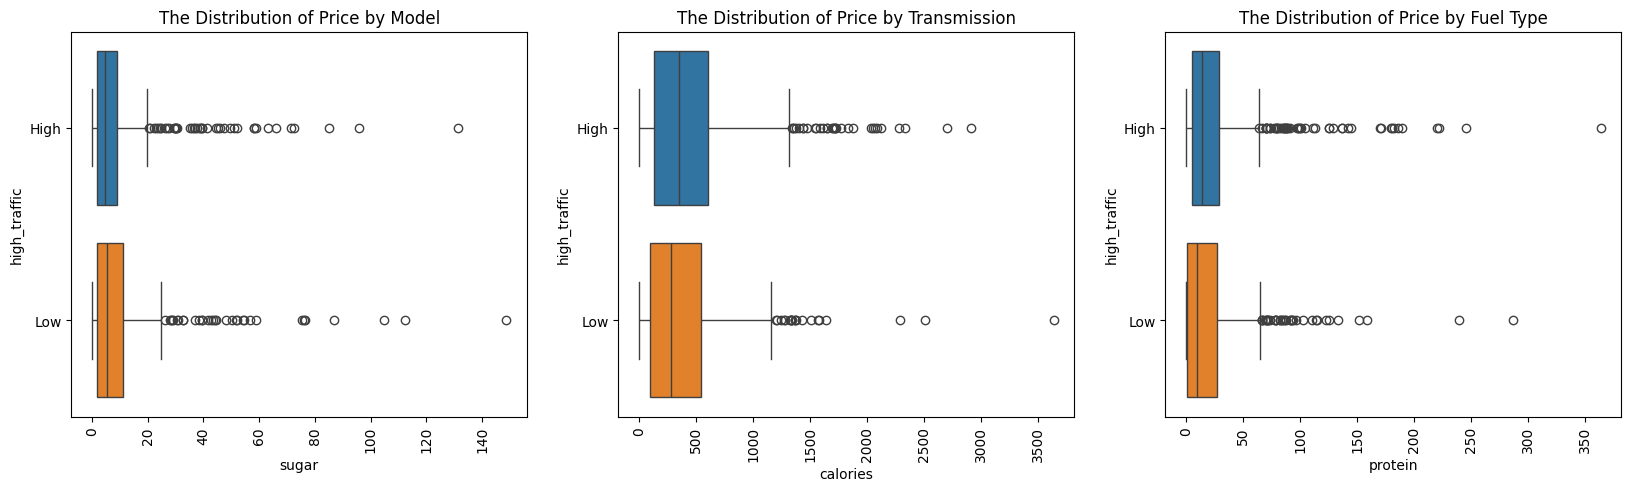

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(data=recipe, x='sugar',y='high_traffic',hue='high_traffic',ax=axes[0]).set(title='The Distribution of Price by Model')
sns.boxplot(data=recipe, x='calories',y='high_traffic',hue='high_traffic',ax=axes[1]).set(title='The Distribution of Price by Transmission')
sns.boxplot(data=recipe, x='protein',y='high_traffic',hue='high_traffic',ax=axes[2]).set(title='The Distribution of Price by Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [122]:
df = recipe.copy()
#df = df.drop('high_traffic_numeric',axis=1)

In [123]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low


In [124]:
df['category'] = df['category'].astype('category')



In [93]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,288.55,21.48,4.55,10.80,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low


In [101]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [125]:
df['servings'] = df['servings'].str.replace(' as a snack','')
df['servings'].unique()

array(['6', '4', '1', '2'], dtype=object)

In [126]:
df['servings'] = df['servings'].astype('int')

In [104]:
import pandas as pd

# Assuming your DataFrame is named 'df'
print(df['high_traffic'].value_counts())

high_traffic
High    574
Low     373
Name: count, dtype: int64


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'df'

# 1. Class Counts
print(df['high_traffic'].value_counts())

# 2. Minority Class Count
minority_count = df['high_traffic'].value_counts().min()

# 3. Separate Data by Class
high_traffic_df = df[df['high_traffic'] == 'High']
low_traffic_df = df[df['high_traffic'] == 'Low']

# 4. Sample the Majority Class
if len(high_traffic_df) > len(low_traffic_df):
    high_traffic_sampled = high_traffic_df.sample(n=minority_count, random_state=42)
    balanced_df = pd.concat([high_traffic_sampled, low_traffic_df])
else:
    low_traffic_sampled = low_traffic_df.sample(n=minority_count, random_state=42)
    balanced_df = pd.concat([high_traffic_df, low_traffic_sampled])

# 5. Shuffle the Balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 6. Use the Balanced DataFrame for Training (example with Logistic Regression)
X = balanced_df.drop('high_traffic', axis=1)
y = balanced_df['high_traffic']

numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

high_traffic
High    574
Low     373
Name: count, dtype: int64
Accuracy: 0.5400


In [105]:
minority_count = df['high_traffic'].value_counts().min()

In [106]:
high_traffic_df = df[df['high_traffic'] == 'High']
low_traffic_df = df[df['high_traffic'] == 'Low']

In [107]:
if len(high_traffic_df) > len(low_traffic_df):
    high_traffic_sampled = high_traffic_df.sample(n=minority_count, random_state=42)
    balanced_df = pd.concat([high_traffic_sampled, low_traffic_df])
else:
    low_traffic_sampled = low_traffic_df.sample(n=minority_count, random_state=42)
    balanced_df = pd.concat([high_traffic_df, low_traffic_sampled])

In [108]:
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [109]:
balanced_df['high_traffic'].value_counts()

high_traffic
High    373
Low     373
Name: count, dtype: int64

C:\Users\Mbah\AppData\Local\Temp\ipykernel_8624\2683406409.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='high_traffic', y='Value', hue='Nutrient', data=recipe_melted, ci=None)


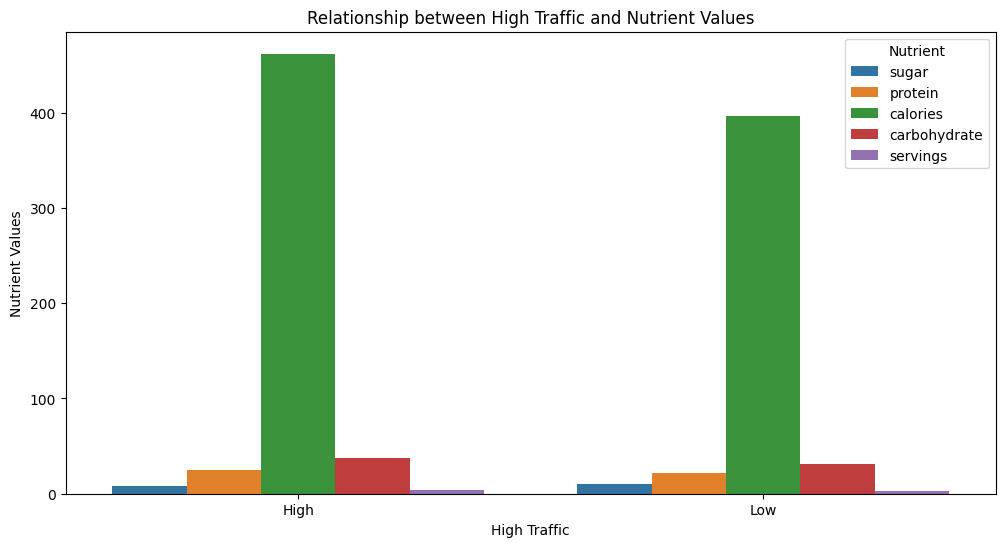

In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

# Melt the dataframe to long-form or tidy-form
recipe_melted = df.melt(id_vars=['high_traffic'], value_vars=['sugar', 'protein', 'calories','carbohydrate','servings'], var_name='Nutrient', value_name='Value')

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='high_traffic', y='Value', hue='Nutrient', data=recipe_melted, ci=None)
plt.title('Relationship between High Traffic and Nutrient Values')
plt.xlabel('High Traffic')
plt.ylabel('Nutrient Values')
plt.legend(title='Nutrient')
plt.show()

[Text(0.5, 1.0, 'Carbohydrate vs High_traffic')]

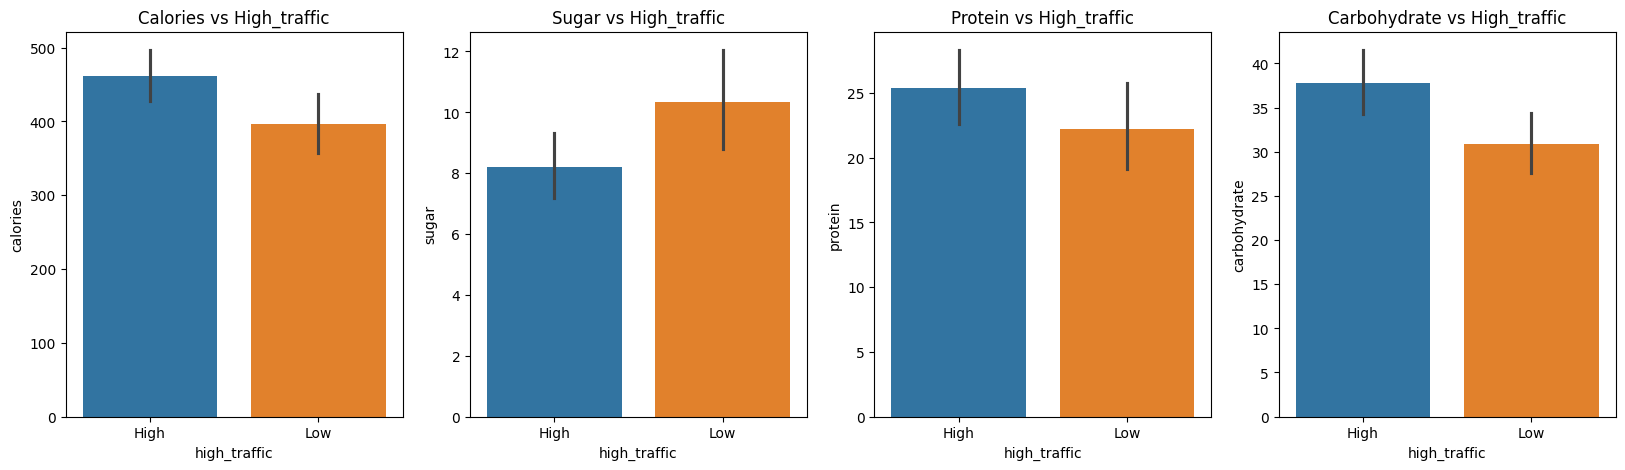

In [19]:
fig, axes = plt.subplots(1,4,figsize=(20,5))
sns.barplot(data=df, x='high_traffic',y='calories',hue='high_traffic',ax=axes[0]).set(title='Calories vs High_traffic')
sns.barplot(data=df, x='high_traffic',y='sugar',hue='high_traffic',ax=axes[1]).set(title='Sugar vs High_traffic')
sns.barplot(data=df, x='high_traffic',y='protein',hue='high_traffic',ax=axes[2]).set(title='Protein vs High_traffic')
sns.barplot(data=df, x='high_traffic',y='carbohydrate',hue='high_traffic',ax=axes[3]).set(title='Carbohydrate vs High_traffic')


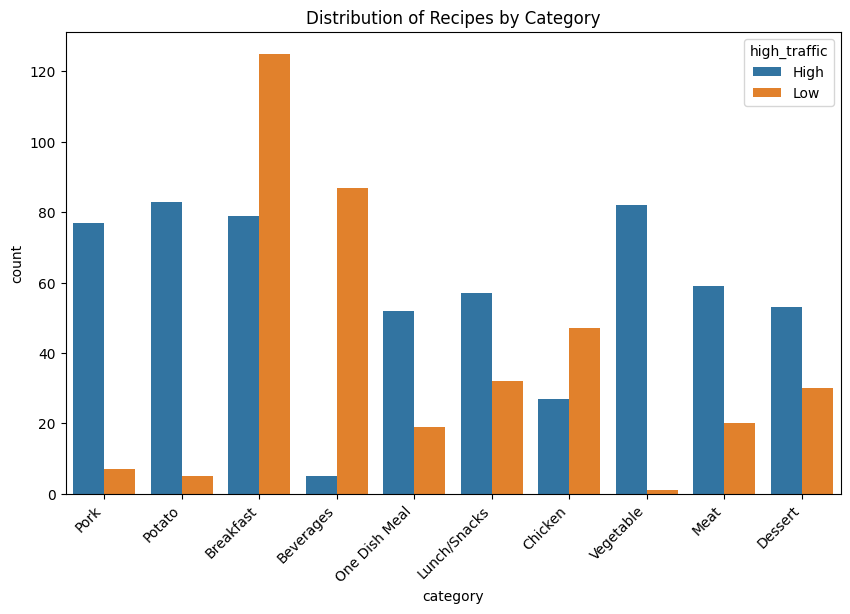

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  



plt.figure(figsize=(10, 6))  
sns.countplot(x='category', data=df, hue='high_traffic')  
plt.title('Distribution of Recipes by Category')
plt.xticks(rotation=45, ha='right') 
plt.show()

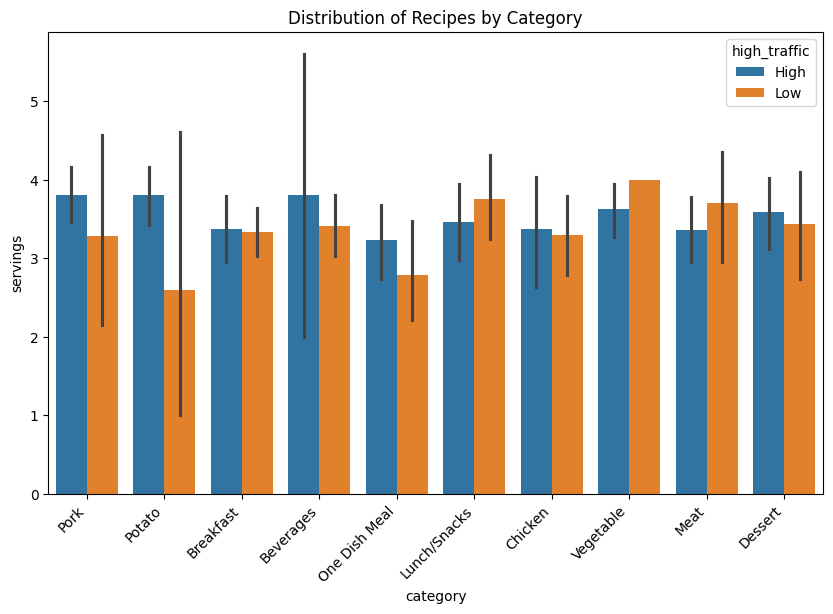

In [39]:
plt.figure(figsize=(10, 6))  
sns.barplot(x='category',y = 'servings', data=df,hue = 'high_traffic')  
plt.title('Distribution of Recipes by Category')
plt.xticks(rotation=45, ha='right') 
plt.show()

[Text(0.5, 1.0, 'The Distribution of Price by Fuel Type')]

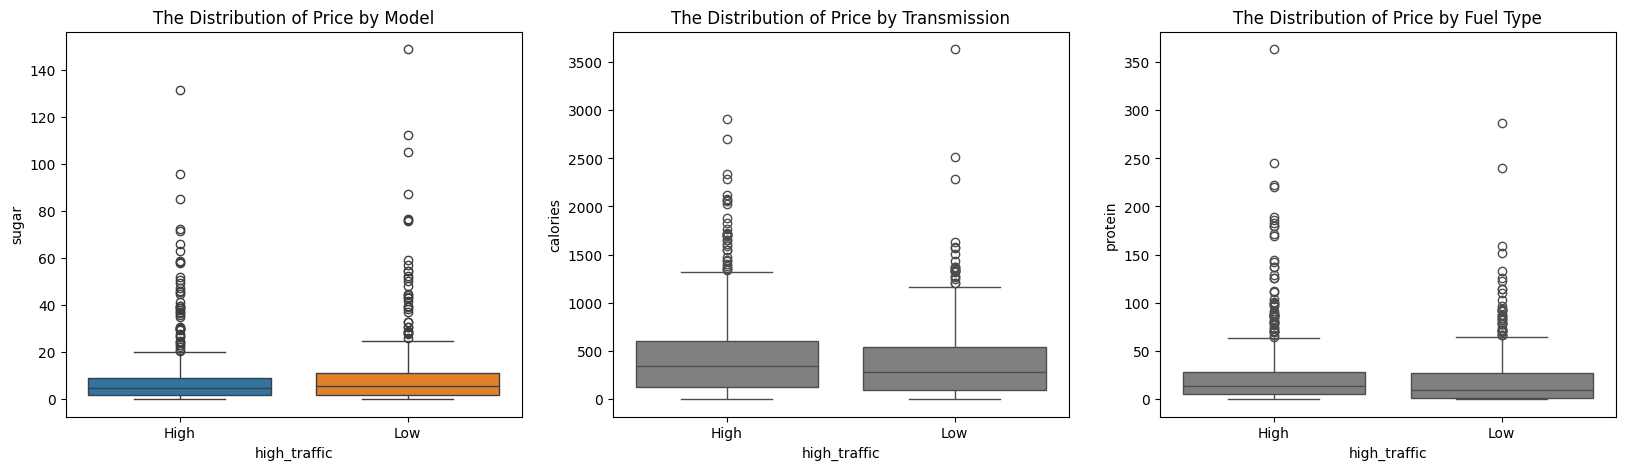

In [21]:

fig, axes = plt.subplots(1,3,figsize = (20,5))
sns.boxplot(data=df, y='sugar',x='high_traffic',hue='high_traffic',ax=axes[0]).set(title='The Distribution of Price by Model')
sns.boxplot(data=df, y='calories',x='high_traffic',color='gray',ax=axes[1]).set(title='The Distribution of Price by Transmission')
sns.boxplot(data=df, y='protein',x='high_traffic',color='gray',ax=axes[2]).set(title='The Distribution of Price by Fuel Type')

In [112]:
labelencoder = LabelEncoder()
#df = pd.get_dummies(df,columns = ['category'])
balanced_df['high_traffic'] = labelencoder.fit_transform(balanced_df['high_traffic'])


In [113]:
balanced_df = pd.get_dummies(balanced_df,columns = ['category'])

In [119]:
kn = knn(n_neighbors=20)
X = balanced_df.drop(columns = ['high_traffic','recipe'],axis=1)
y = balanced_df['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=48)
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
print('Accuracy:',kn.score(X_test,y_test))


Accuracy: 0.5178571428571429


In [ ]:

train_accuracies = {}
test_accuracies = {}
for i in range(1,50):
    kn = knn(n_neighbors=i)
    kn.fit(X_train,y_train)
    train_accuracies[i] = kn.score(X_train,y_train)
    test_accuracies[i] = kn.score(X_test,y_test)
plt.figure(figsize=(10,6))
plt.plot(list(train_accuracies.keys()),list(train_accuracies.values()),label = 'Train Accuracy')
plt.plot(list(test_accuracies.keys()),list(test_accuracies.values()),label = 'Test Accuracy')
plt.legend()
plt.show()

calories: -0.0001
carbohydrate: -0.0021
sugar: 0.0097
protein: -0.0032
servings: -0.0075
category_Beverages: 2.8113
category_Breakfast: 1.1268
category_Chicken: 1.2689
category_Dessert: -0.1992
category_Lunch/Snacks: -0.1053
category_Meat: -0.2918
category_One Dish Meal: 0.1138
category_Pork: -1.5222
category_Potato: -1.7015
category_Vegetable: -2.0192


C:\Users\Mbah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train are your training data

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]  # For binary classification
# or model.coef_ for multiclass.

# Print coefficients along with feature names
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

calories: -0.0001
carbohydrate: -0.0027
sugar: 0.0016
protein: 0.0011
servings: 0.0470
category_Beverages: 2.6527
category_Breakfast: 1.2851
category_Chicken: 1.5047
category_Dessert: 0.0437
category_Lunch/Snacks: 0.5088
category_Meat: -0.8561
category_One Dish Meal: 0.0988
category_Pork: -1.4910
category_Potato: -1.9121
category_Vegetable: -2.1314


C:\Users\Mbah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
y_perd = model.predict(X_test)
print(model.score(X_test,y_test))

0.6830357142857143


<Axes: ylabel='None'>

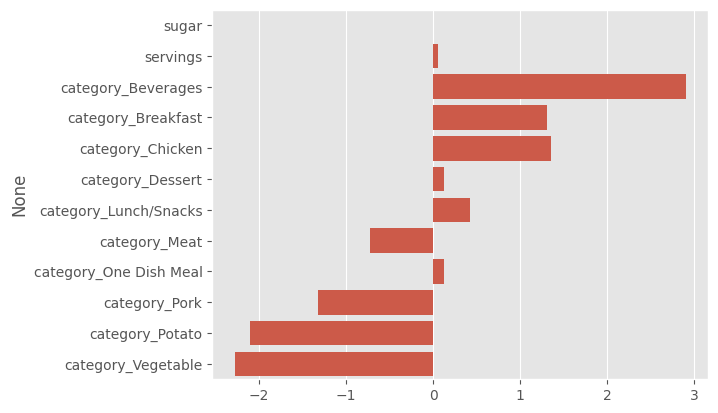

In [117]:
sns.barplot(x= coefficients, y = X_train.columns)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import VotingClassifier

tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, max_features = None, min_samples_leaf = 4, min_samples_split = 10)
#tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7614035087719299


In [57]:
kn = knn()
dt = DecisionTreeClassifier()
lg = LogisticRegression()
classifiers = [('Logistic Regression', lg),
               ('K nearest Neighbors',kn),
               ('Classification Tree',dt)]
vc= VotingClassifier(estimators=classifiers)
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)
print('voting classifier {}'.format(accuracy_score(y_test,y_pred)))

voting classifier 0.7157894736842105


C:\Users\Mbah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [249]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,accuracy_score

# Assuming y_test and y_pred are your true labels and predicted labels

# Using classification_report (recommended for a quick overview)
#print(classification_report(y_test, y_pred))

# Or, calculate each metric separately:
precision = precision_score(y_test, y_pred,pos_label=0)  # Adjust pos_label if needed
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {acc:.4f}")

Precision: 0.7627
Recall: 0.6075
F1-score: 0.6047
Accuracy: 0.7018


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have X_train, y_train, X_test, y_test defined

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Create a DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Create GridSearchCV
grid_search = RandomizedSearchCV(tree, param_grid, cv=5, scoring='accuracy')  # Use accuracy for classification

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)

# Make predictions
y_pred = best_tree.predict(X_test)

# Evaluate the model

print('Accuracy:', best_tree.score(X_test, y_test))

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 3, 'criterion': 'gini'}
Accuracy: 0.7403508771929824


In [265]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, y_train are your training data

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_

# Print feature importances along with feature names
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance:.4f}")


calories: 0.2493
carbohydrate: 0.2238
sugar: 0.1831
protein: 0.2932
servings: 0.0507


<Axes: ylabel='None'>

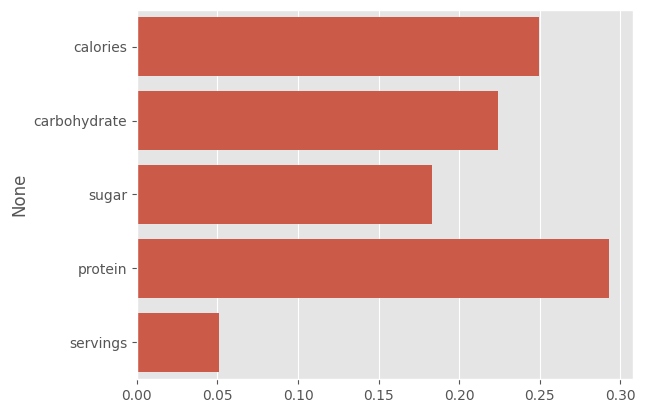

In [266]:
sns.barplot(x= importances, y = X_train.columns)

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

## results
Accuracy score of the Logistic regression was 77%, which was 3% off the target prediction criterium. the DecisionTree classifier didn't do so well either; it had an accuracy score of 78%, which was 2% less the target accuracy.